In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [47]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [49]:
pr=LinearRegression()

In [50]:
pr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(pr.coef_)
print(pr.intercept_)
y_check=pr.predict(x_test)

[28.07637482]
-3.5542386451751105


In [52]:
r2_score(y_test,y_check)

0.33021406456623015

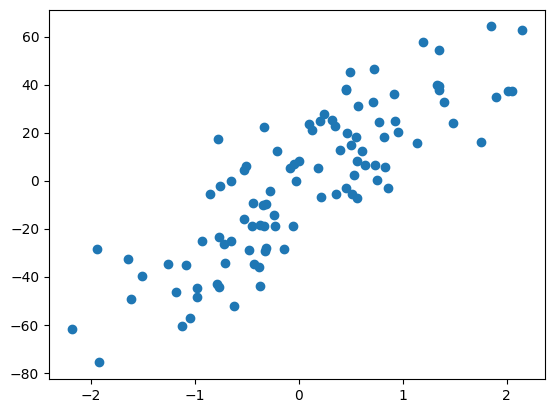

In [53]:
plt.scatter(x,y)

In [54]:
lr=Ridge(alpha=1.0)

In [55]:
lr.fit(x_train,y_train)

Ridge()

In [56]:
from sklearn.metrics import r2_score

In [57]:
y_pred=lr.predict(x_test)

In [58]:
r2_score(y_test,y_pred)

0.33175376921214794

In [59]:
lr.coef_

array([27.7302658])

In [72]:
x_train.shape[0]

80

In [62]:
#Now making my own class from scratch.

In [73]:
class ridge:
    def __init__(self,alpha=0.1):
        self.coef_=None
        self.intercept_=None
        self.alpha=alpha
    def fit(self,x_train,y_train):
        neu=0
        den=0

        for i in range(x_train.shape[0]):
            neu = neu + (x_train[i] - x_train.mean())*(y_train[i] - y_train.mean())
            den = den + (x_train[i] - x_train.mean())*(x_train[i] - x_train.mean())
        self.coef_ = neu / (den + self.alpha)
        print("This is my coef_ value:",self.coef_)
        self.intercept_ = y_train.mean() - (self.coef_ * x_train.mean())
        print("intercept_ value is here:",self.intercept_)
    def predict(self,x_test):
        return (x_test * self.coef_) + self.intercept_

In [74]:
ridge=ridge()

In [75]:
ridge.fit(x_train,y_train)

This is my coef_ value: [28.04137562]
intercept_ value is here: [-3.55284977]


In [76]:
#Now doin the same thing with multi variable.

In [77]:
from sklearn.datasets import load_diabetes

In [78]:
x,y,=load_diabetes(return_X_y=True)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [85]:
lr=LinearRegression()

In [86]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
print(lr.coef_)
print(lr.intercept_)

[ -17.28691266 -248.0885923   578.27946674  315.72999856 -571.32572115
  292.43070367  -17.46493017  120.18338433  695.01416778  108.05301725]
150.2336766764973


In [90]:
pred=lr.predict(x_test)

In [91]:
r2_score(y_test,pred)

0.3670103737004128

In [95]:
r=Ridge()

In [96]:
r.fit(x_train,y_train)

Ridge()

In [97]:
print(r.coef_)
print(r.intercept_)

[  25.62810647  -72.56087729  306.38019085  193.22847299   16.82426661
  -15.81318396 -141.47594586  114.73268098  239.36526208  128.12102701]
150.48687857833198


In [98]:
pred=r.predict(x_test)

In [99]:
r2_score(y_test,pred)

0.3843633492401425

In [100]:
#Now doing the same the with own class.

In [132]:
class ridge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef = None
        self.intercept_ = None
    def fitData(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        #Draw the identity metrix.
        identity_metrix=np.identity(x_train.shape[1])
        self.coef_ = np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha*identity_metrix).dot(x_train.T).dot(y_train)
        self.intercept_ = self.coef_[0]
        self.coef_=self.coef_[1,]
        print(self.coef_)
        print(self.intercept_)
    def prediction(self,x_test):
        return (x_test * self.coef_) + self.intercept_

In [133]:
ridge=ridge()

In [134]:
ridge.fitData(x_train,y_train)

-5.135938752508758
150.28212715147606


In [138]:
y_pred = ridge.prediction(x_test) 
y_pred

array([[150.31044957, 150.51140386, 149.9929371 , 150.47039054,
        150.53045676, 150.50278055, 150.65630057, 150.08696676,
        150.02131374, 149.98983164],
       [150.38507555, 150.51140386, 150.71809766, 150.41734372,
        150.46685547, 150.45774783, 150.07013191, 150.54750497,
        150.70521906, 150.52167182],
       [150.62760998, 150.51140386, 150.58524381, 150.1167451 ,
        150.54459038, 150.53655509, 150.33485324, 150.48496275,
        150.27183246, 150.1600205 ],
       [149.97463266, 150.02183717, 150.16453998, 150.02833375,
        150.19831671, 150.22132607, 150.35376191, 150.29544085,
        150.07903932, 150.1812941 ],
       [150.03060214, 150.02183717, 149.64973134, 149.85151103,
        150.82019595, 150.80031815, 150.6373919 , 150.29544085,
        150.09392719, 150.43657739],
       [150.27313658, 150.51140386, 150.3029294 , 150.31125009,
        150.32551928, 150.40467356, 150.01340591, 150.48496275,
        150.32805989, 150.35148296],
       [15